## Descriptive and Inferential Statistics

In [1]:
import math
import random
import numpy as np
import scipy
import sympy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mean
sample = [1,3,2,5,7,0,2,3]
mean = sum(sample) / len(sample)
print(mean)

2.875


In [3]:
# weighted mean
sample = [90, 80, 63, 87]
weights = [.20, .20, .20, .40]
weighted_mean = sum(s*w for s,w in zip(sample, weights)) / sum(weights)
print(weighted_mean)

81.4


In [4]:
# median
sample = [0,1,5,7,9,10,14]
def median(values):
    ordered = sorted(values)
    n = len(ordered)
    mid = n//2 if n%2 else n//2-1
    if n%2:
        return ordered[mid]
    else:
        return (ordered[mid] + ordered[mid+1]) / 2.0

print(median(sample))

7


In [5]:
# mode (unimodal and multimodal)
sample = [1,3,2,5,7,0,2,3]
def mode(values):
    counts = dict()
    for s in values:
        counts[s] = counts.get(s, 0)+1
    max_count = max(counts.values())
    modes = [v for v in set(values) if counts[v] == max_count]
    return modes

print(mode(sample))

[2, 3]


In [6]:
# variance
data = [0,1,5,7,9,10,14]
def variance(values):
    mean = sum(values) / len(values)
    _variance = sum((v-mean)**2 for v in values) / len(values)
    return _variance

print(variance(data))

21.387755102040813


In [7]:
# standard deviation
data = [0,1,5,7,9,10,14]
def std_dev(values):
    return math.sqrt(variance(values))

print(std_dev(data))

4.624689730353898


In [8]:
# variance and standard deviation for a sample
def variance(values, is_sample: bool = False):
    mean = sum(values) / len(values)
    _variance = (
        sum((v-mean)**2 for v in values) /
        (len(values) - (1 if is_sample else 0))
    )

    return _variance

def std_dev(values, is_sample: bool = False):
    return math.sqrt(variance(values, is_sample))

print(f"VARIANCE = {variance(data, is_sample=True)}")
print(f"STD DEV = {std_dev(data, is_sample=True)}")

VARIANCE = 24.95238095238095
STD DEV = 4.99523582550223


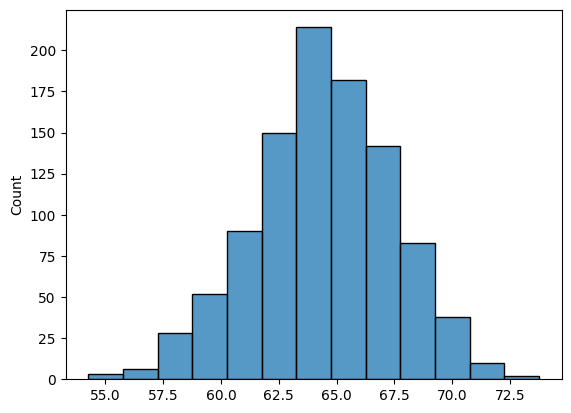

In [9]:
# normal distribution (histogram)
data = np.array([
        scipy.stats.norm.ppf(
            random.uniform(0.0, 1.0),
            loc= 64.43,
            scale= 2.99
        ) for i in range(1000)
])

sns.histplot(data= data, binwidth= 1.5);

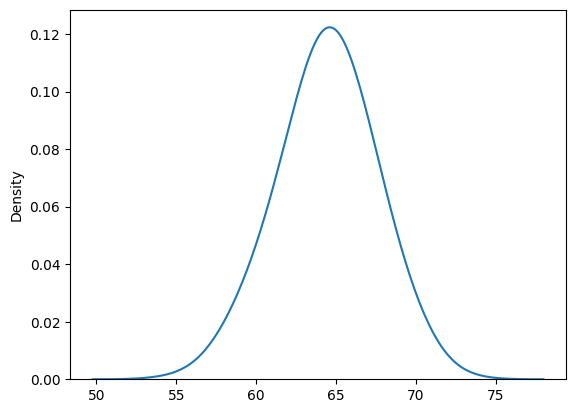

In [10]:
# normal distribution (density)
sns.kdeplot(data= data, bw_adjust= 2);

In [11]:
# cumulative distribution
mu = 64.43
sigma = 2.99

x = scipy.stats.norm.cdf(64.43, mu, sigma)
print(x)

0.5


In [12]:
# probability between 62 and 66
x = scipy.stats.norm.cdf(66, mu, sigma) - scipy.stats.norm.cdf(62, mu, sigma)
print(x)

0.4920450147062894


In [13]:
# inverse CDF
x = scipy.stats.norm.ppf(0.95, loc= 64.43, scale= 2.99)
print(x)

69.3481123445849


In [14]:
# z score
def z_score(x, mean, std):
    return (x - mean) / std

mean = 140000
std_dev = 3000
x = 150000

print(z_score(x, mean, std_dev))

3.3333333333333335


In [15]:
# coefficient of variation
def coeff_variation(mean, std):
    return std / mean

print(coeff_variation(mean, std_dev))

0.02142857142857143


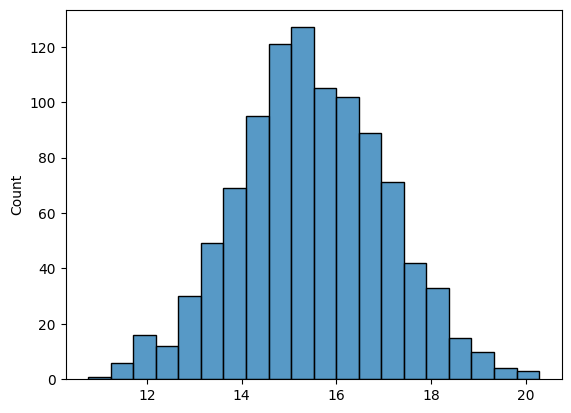

In [16]:
# central limit theorem
sample_size = 31
sample_count = 1000

means = np.array([
    sum([random.uniform(0.0, 1.0) for i in range(sample_size)])
    for i in range(sample_count)
])

sns.histplot(data= means, bins=20);

In [17]:
# confidence intervals
def critical_z_value(p):
    norm_dist = scipy.stats.norm(loc=0.0, scale=1.0)
    left_tail_area = (1.0 - p) / 2.0
    right_tail_area = 1.0 - ((1.0 - p) / 2.0)
    return norm_dist.ppf(left_tail_area), norm_dist.ppf(right_tail_area)

def confidence_interval(p, sample_mean, sample_std, n):
    lower, upper = critical_z_value(p)
    lower_ci = lower * (sample_std / math.sqrt(n))
    upper_ci = upper * (sample_std / math.sqrt(n))
    return sample_mean + lower_ci, sample_mean + upper_ci

print(confidence_interval(p=0.95, sample_mean=64.408, sample_std=2.05, n=31))

(63.68635915701992, 65.12964084298008)


In [18]:
# hypothesis testing
mean = 18
std_dev = 1.5
lower = scipy.stats.norm.ppf(0.025, mean, std_dev)
upper = scipy.stats.norm.ppf(0.975, mean, std_dev)

x = scipy.stats.norm.cdf(upper, mean, std_dev) - \
    scipy.stats.norm.cdf(lower, mean, std_dev)

print(lower)
print(upper)
print(x)

15.060054023189918
20.93994597681008
0.95


In [19]:
# one tailed
x = scipy.stats.norm.ppf(0.05, mean, std_dev)
print(x)
test_val = 16
p_value = scipy.stats.norm.cdf(test_val, mean, std_dev)
print(p_value)

15.53271955957279
0.09121121972586788


In [20]:
# two tailed
x1 = scipy.stats.norm.ppf(0.025, mean, std_dev)
x2 = scipy.stats.norm.ppf(0.975, mean, std_dev)
upper_test_val = mean + (abs(mean - test_val))
p1 = scipy.stats.norm.cdf(test_val, mean, std_dev)
p2 = 1 - scipy.stats.norm.cdf(upper_test_val, mean, std_dev)
print(p1 + p2)

0.18242243945173575


In [21]:
# T distribution
n = 25
lower = scipy.stats.t.ppf(0.025, df= n-1)
upper = scipy.stats.t.ppf(0.975, df= n-1)
print(lower, upper)

-2.063898561628021 2.0638985616280205


In [22]:
# exercise 1
diameters = [1.78, 1.75, 1.72, 1.74, 1.77]
mean = sum(diameters) / len(diameters)
std_dev = math.sqrt(
    sum([(d - mean)**2 for d in diameters])
    / (len(diameters)-1)
)
print(mean)
print(std_dev)

1.752
0.023874672772626667


In [23]:
# exercise 2
mean = 42
std_dev = 8

result = scipy.stats.norm.cdf(30, mean, std_dev) \
    - scipy.stats.norm.cdf(20, mean, std_dev)

print(result)

0.0638274380338035


In [24]:
# exercise 3
n = 34
mean = 1.715588
std_dev = 0.029252
p = 0.99

crit_z = scipy.stats.norm(loc=0.0, scale=1.0).ppf((1-p)/2.0)
print(crit_z)
conf_upper = mean - (crit_z * (std_dev / math.sqrt(n)))
conf_lower = mean + (crit_z * (std_dev / math.sqrt(n)))
print(conf_lower, conf_upper)

-2.5758293035489004
1.7026658973748656 1.7285101026251342


In [25]:
# exercise 4
mu = 10345.0
sigma = 552.0
n = 45
x_bar = 11641.0

one_tailed = 1 - scipy.stats.norm.cdf(x_bar, mu, sigma)
print(one_tailed)
upper_test_val = mu - abs(x_bar - mu)
two_tailed = (
    one_tailed +
    scipy.stats.norm.cdf(upper_test_val, mu, sigma)
)
print(two_tailed)

0.009441667982480695
0.018883335964961383
